In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt
from math import log
from math import ceil
from math import sqrt
from numpy import random

In [2]:
def isPrime(n) : 
  
    # Corner cases 
    if (n <= 1) : 
        return False
    if (n <= 3) : 
        return True
    if (n % 2 == 0 or n % 3 == 0) : 
        return False
  
    i = 5
    while(i * i <= n) : 
        if (n % i == 0 or n % (i + 2) == 0) : 
            return False
        i = i + 6
  
    return True

In [3]:
#This is bit string parity
def getParity(n):
  parity = 0
  while(n):
    if(n%2):
      parity = parity+1
    n = int(n/2)
  
  return (parity%2)

In [4]:
#This is integer parity
def Parity(n):
  
  return (n%2)

In [5]:
def GCD(x, y): 
  
  while(y): 
      x, y = y, x % y 

  return x

In [13]:
def get_Entropy(prs):
  p1 = np.sum(np.array(prs))/len(prs)
  p0 = 1-p1

  if(p0==0 or p1==0):
    return 0

  entropy = -1*p1*log(p1,2)-p0*log(p0,2)

  return entropy

In [16]:
def auto_correlation(x,k):
	r = 0.0
	for i in range(len(x)-k):
		r = r+x[i]*x[i+k]

	return r

In [6]:
def BBS(bit_state_length, sequence_length):

  prime_list = []
  a_min = pow(2,ceil(bit_state_length/2))
  a_max = pow(2,ceil(bit_state_length/2)+1)
  for i in range(a_min+1,a_max):
    if(isPrime(i) and (i%4 == 3)):
      prime_list.append(i)

  P = prime_list[random.randint(len(prime_list)-1)]
  Q = prime_list[random.randint(len(prime_list)-1)]

  while(P==Q):
    Q = prime_list[random.randint(len(prime_list))]

  N = P*Q

  Zn = []
  for i in range(1,N):
    if(GCD(N,i) == 1):
      Zn.append(i)
  
  if((P-1)*(Q-1) == len(Zn)):
    print("Evaluation of Zn* successful")
  else:
    print("Totient Function evaluation error")
    quit()

  seed_set = []
  for i in Zn:
    item = (i**2)%N
    seed_set.append(item)

  seed = seed_set[random.randint(len(seed_set))]

  prs = []
  for i in range(sequence_length):
    prs.append(Parity(seed))
    seed = (seed**2)%N
  
  return P, Q, N, prs

Evaluation of Zn* successful
10 :  0.9182958340544896


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


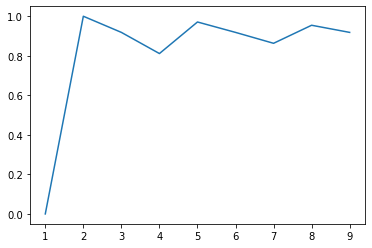

Evaluation of Zn* successful
100 :  0.9875257101057102


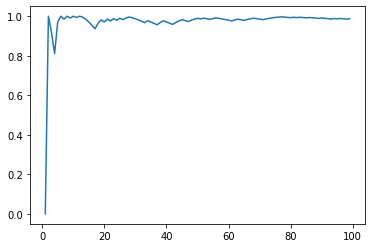

Evaluation of Zn* successful
1000 :  0.9992127358844328


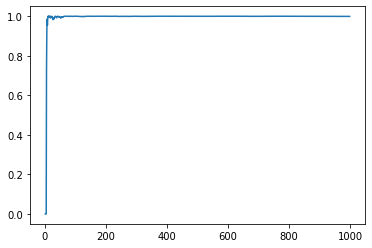

Evaluation of Zn* successful
10000 :  0.9999045806042288


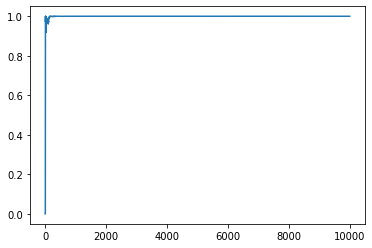

Evaluation of Zn* successful
100000 :  0.9977728732375842


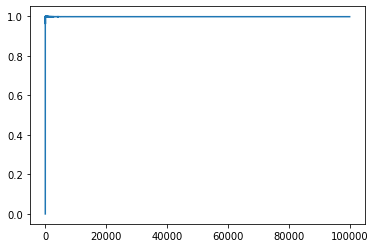

In [19]:
bit_state_length = 20
for sequence_length in [10,100,1000,10000,100000]:
  P, Q, N, prs = BBS(bit_state_length, sequence_length)
  
  entropy = []
  for i in range(len(prs)):
    entropy.append(get_Entropy(prs[:i]))

  print(sequence_length,": ",entropy[-1])
  x = range(len(prs))
  plt.plot(x,entropy)
  plt.show()

Evaluation of Zn* successful


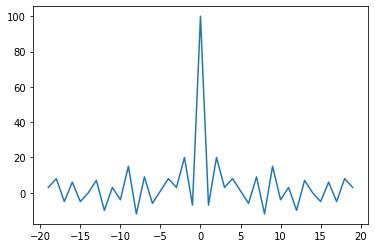

Evaluation of Zn* successful


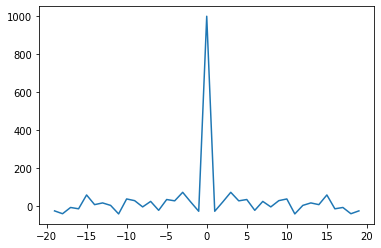

Evaluation of Zn* successful


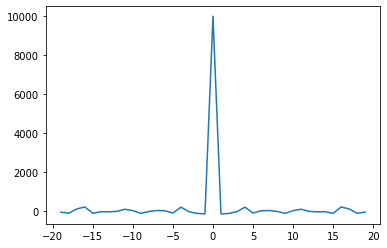

Evaluation of Zn* successful


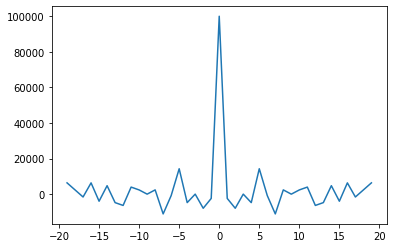

In [20]:
bit_state_length = 20
for sequence_length in [100,1000,10000,100000]:
  P, Q, N, prs = BBS(bit_state_length, sequence_length)

  r = []
  prs_new = (np.array(prs)*2-1).tolist()

  for k in range(20):
    r.append(auto_correlation(prs_new,k))

  k = range(-19,20)
  rminus = np.flip(np.array(r))
  rminus = rminus[:rminus.size-1]
  rminus = rminus.tolist()

  r = rminus+r

  plt.plot(k,r)
  plt.show()